In [154]:
folder = "../../data_piro/1. ICPMS_Output/"

In [155]:
import pandas as pd

In [156]:
def read_massspec_data(path):
    extension = os.path.splitext(path)[1].lower()
    if extension == ".txt":
        header = pd.read_table(path, sep='\t', nrows=1, header=None)
        colnames = header.loc[:, 1:].values[0].tolist()
        colnames = ['time'] + colnames
        df = pd.read_table(path, sep='\t', skiprows=[0, 1, 2, 3, 4], index_col=False,
                           header=None)
        df = df.loc[:, 0:15]
        df.columns = colnames

    elif extension == ".csv":
        df = pd.read_csv(path, sep=";")
    else:
        print("Unknown file type")
        df = None
    return df

In [157]:
import os

In [158]:
files = os.listdir(folder)

In [159]:
n = 4
print(files[4])
df = read_massspec_data(os.path.join(folder,files[n]))

FEBS-2A-51.TXT


<AxesSubplot:xlabel='time'>

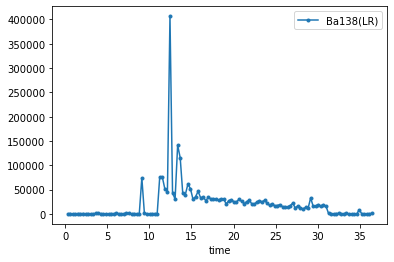

In [160]:
df[['time','Ba138(LR)']].plot(x="time", y="Ba138(LR)",marker='.')

In [162]:
cols = df.columns

Index(['time', 'Li6(LR)', 'Li7(LR)', 'Na23(LR)', 'Mg24(LR)', 'K39(LR)',
       'Ca43(LR)', 'Ca44(LR)', 'Mn55(LR)', 'Co59(LR)', 'Ni60(LR)', 'Cu63(LR)',
       'Sr88(LR)', 'Cd111(LR)', 'Ba137(LR)', 'Ba138(LR)'],
      dtype='object')

{'time': 3.40696059601263,
 'Li6(LR)': 5.881084879745803,
 'Li7(LR)': 0.5511506499695179,
 'Na23(LR)': 1.4769654431773567,
 'Mg24(LR)': 0.6282175157629124,
 'K39(LR)': 3.3584368981496,
 'Ca43(LR)': 2.3144543348643865,
 'Ca44(LR)': 2.7300358930941417,
 'Mn55(LR)': nan,
 'Co59(LR)': 0.6061148071554429,
 'Ni60(LR)': 1.1552275548823776,
 'Cu63(LR)': 0.5219200954915766,
 'Sr88(LR)': 2.3927675663970898,
 'Cd111(LR)': 0.5250762032277143,
 'Ba137(LR)': 0.39465172987378766,
 'Ba138(LR)': 0.7084456594349331}

In [165]:
from sklearn.cluster import SpectralClustering, DBSCAN

In [166]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


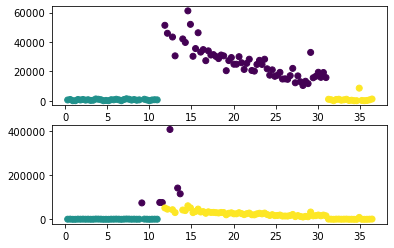

In [239]:
c = "Ba138(LR)"
X = df[["time",c]].values
ss = StandardScaler()
sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
db = DBSCAN(eps = 0.4)
X = ss.fit_transform(X)
db_fit = db.fit(X)
mask = db_fit.labels_ != -1
X_ = X[mask]
sc_fit = sc.fit(X_)

plt.subplot(211)
plt.scatter(df["time"][mask], df[c][mask], c = sc_fit.labels_)
plt.subplot(212)
plt.scatter(df["time"], df[c], c = db_fit.labels_)

In [142]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

In [176]:
def rank_signal(df, c = "Ba138(LR)"):
    X = df[["time",c]].values
    ss = StandardScaler()
    sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
    db = DBSCAN(eps = 0.5)
    X = ss.fit_transform(X)
    db_fit = db.fit(X)
    mask = db_fit.labels_ != -1
    X_ = X[mask]
    sc_fit = sc.fit(X_)
    
    #db = DBSCAN(eps = 0.6)
    #db_fit = db.fit(X_)
    num_db_clusters = len(np.unique(db_fit.labels_[mask]))
    return silhouette_score(X_, sc_fit.labels_) #if num_db_clusters < 3 else 0

In [261]:
{c:rank_signal(df, c) for c in cols if c is not 'time'}

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-261-46bc06f07c5d>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  {c:rank_signal(df, c) for c in cols if c is not 'time'}
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral

{'Li6(LR)': 0.5765478286801854,
 'Li7(LR)': 0.5481555472633464,
 'Na23(LR)': 0.5978730564696851,
 'Mg24(LR)': 0.4942468952686428,
 'K39(LR)': 0.6946421748601149,
 'Ca43(LR)': 0.6545165594243157,
 'Ca44(LR)': 0.6641881164945369,
 'Mn55(LR)': 0.5648929606297964,
 'Co59(LR)': 0.5221013480435426,
 'Ni60(LR)': 0.3852857880808635,
 'Cu63(LR)': 0.5594105544896866,
 'Sr88(LR)': 0.6362391647460791,
 'Cd111(LR)': 0.5428779011762348,
 'Ba137(LR)': 0.5861622305906902,
 'Ba138(LR)': 0.519884649405057}

In [266]:
# remove outliers 

def standardize_data(X):

    ss = StandardScaler()
    return ss.fit_transform(X)

def remove_outliers(X):
    """
    Remove outliers
    df: dataframe
    c: column to apply to
    """
    
    db = DBSCAN(eps = 0.5)
    db_fit = db.fit(X)
    mask = db_fit.labels_ != -1

    return X[mask]

def compute_range_ratio(X):
    sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
    sc_fit = sc.fit(X)
    pp = sc_fit.labels_
    x0 = X[pp==0][:,0]
    x1 = X[pp==1][:,0]
    x2 = X[pp==2][:,0]
    x_range = max(X[:,0]) - min(X[:,0])
    return (max(x0) - min(x0)) / x_range + (max(x1) - min(x1)) / x_range + (max(x2) - min(x2)) / x_range 

def compute_mean_distance(X):
    mean = X.mean()
    upper = X[X>mean]
    lower = X[X<=mean]
    return (upper.mean()-lower.mean())/upper.std()

def compute_metric(df, c, threshold = 1.05):
    X = df[["time",c]].values
    X = standardize_data(X)
    X = remove_outliers(X)
    
    rr = compute_range_ratio(X)
    dd = compute_mean_distance(X)
    
    metric = dd*int(rr < threshold)
    return metric

metrics = {c:compute_metric(df, c) for c in cols  if c != 'time'}
print(metrics)
order = sorted(metrics, key=metrics.get, reverse=True)
print(order)

C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib

{'Li6(LR)': 0.0, 'Li7(LR)': 1.7014887271333494, 'Na23(LR)': 0.0, 'Mg24(LR)': 2.0844537113151, 'K39(LR)': 3.6387827426429142, 'Ca43(LR)': 3.266523997447738, 'Ca44(LR)': 3.204683843345741, 'Mn55(LR)': 2.3663034050237957, 'Co59(LR)': 2.2815580483987943, 'Ni60(LR)': 0.0, 'Cu63(LR)': 1.9451382296312743, 'Sr88(LR)': 2.767777583002989, 'Cd111(LR)': 2.1287606053676207, 'Ba137(LR)': 1.7669722424481704, 'Ba138(LR)': 2.3477850833719636}
['K39(LR)', 'Ca43(LR)', 'Ca44(LR)', 'Sr88(LR)', 'Mn55(LR)', 'Ba138(LR)', 'Co59(LR)', 'Cd111(LR)', 'Mg24(LR)', 'Cu63(LR)', 'Ba137(LR)', 'Li7(LR)', 'Li6(LR)', 'Na23(LR)', 'Ni60(LR)']


C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


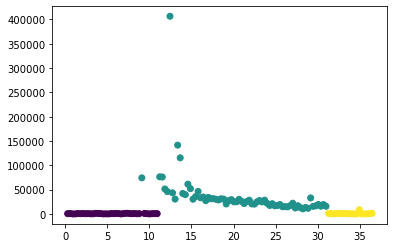

In [237]:
c = "Ba138(LR)"
X = df[["time",c]].values
ss = StandardScaler()
sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
X = ss.fit_transform(X)

#X_ = X[mask]
sc_fit = sc.fit(X)

plt.scatter(df["time"], df[c], c = sc_fit.labels_)


In [238]:
pp = sc_fit.labels_
#np.unique(pp)
#pp.index(1)
x0 = X[pp==0][:,0]
x1 = X[pp==1][:,0]
x2 = X[pp==2][:,0]
x_range = max(X[:,0]) - min(X[:,0])
(max(x0) - min(x0)) / x_range + (max(x1) - min(x1)) / x_range + (max(x2) - min(x2)) / x_range 

1.0420263654335802

In [249]:
X

array([[3.05000007e-01, 4.96000000e+02],
       [6.09000027e-01, 8.26666687e+02],
       [9.12999988e-01, 0.00000000e+00],
       [1.21599996e+00, 0.00000000e+00],
       [1.51999998e+00, 8.26666687e+02],
       [1.82400000e+00, 4.96000000e+02],
       [2.12800002e+00, 8.26666687e+02],
       [2.43099999e+00, 3.96799988e+02],
       [2.73499990e+00, 6.61333313e+02],
       [3.03900003e+00, 1.98399994e+02],
       [3.34200001e+00, 3.30666656e+02],
       [3.64599991e+00, 1.19040002e+03],
       [3.95000005e+00, 9.92000000e+02],
       [4.25400019e+00, 6.61333313e+02],
       [4.55700016e+00, 0.00000000e+00],
       [4.86100006e+00, 1.98399994e+02],
       [5.16499996e+00, 0.00000000e+00],
       [5.46899986e+00, 6.61333313e+02],
       [5.77199984e+00, 5.95200012e+02],
       [6.07600021e+00, 9.92000000e+02],
       [6.38000011e+00, 5.95200012e+02],
       [6.68300009e+00, 0.00000000e+00],
       [6.98699999e+00, 7.93599976e+02],
       [7.29099989e+00, 1.32300000e+03],
       [7.594999

{'time': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 'Li6(LR)': array([ True,  True,  True

[1, 2, 3, 4, 1, 1, 1, 4, 5]

In [241]:
df

,time,Li6(LR),Li7(LR),Na23(LR),Mg24(LR),K39(LR),Ca43(LR),Ca44(LR),Mn55(LR),Co59(LR),Ni60(LR),Cu63(LR),Sr88(LR),Cd111(LR),Ba137(LR),Ba138(LR)
0,0.305000,0.00,4395.285645,1.111211e+06,2.976286e+03,522529.34375,2811.166748,28817.666016,4366.600098,1388.800049,16455.714844,4819.714355,19364.500000,0.000000,0.000000,496.000000
1,0.609000,71940384.00,743673.625000,1.130942e+06,3.685286e+03,518168.00000,1653.333374,30314.166016,6782.333496,826.666687,19696.500000,3968.714355,20194.500000,0.000000,0.000000,826.666687
2,0.913000,95945392.00,735168.000000,1.082032e+06,2.976500e+03,530306.00000,992.000000,36290.167969,5457.833496,826.666687,12906.142578,3543.714355,13188.713867,0.000000,198.399994,0.000000
3,1.216000,594225.25,729825.625000,1.089394e+06,3.141833e+03,528678.00000,1275.571411,28991.166016,4300.000000,330.666656,11770.286133,5623.666504,16028.286133,0.000000,0.000000,0.000000
4,1.520000,71777672.00,727929.812500,1.092338e+06,4.134167e+03,516727.34375,3142.000000,31641.166016,8138.600098,1389.000000,15389.000000,4677.856934,16313.428711,0.000000,0.000000,826.666687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,35.234001,97337432.00,727260.812500,4.315094e+06,1.711480e+06,520914.65625,1559.000000,25662.666016,6119.333496,1587.400024,31778.142578,6804.714355,16455.572266,330.666656,198.399994,165.333328
116,35.537998,592495.50,724155.187500,1.047351e+06,1.818667e+03,533992.00000,1488.166626,23675.000000,5623.000000,330.666656,15224.166992,4299.666504,10777.142578,330.666656,0.000000,0.000000
117,35.841000,77518672.00,731616.000000,1.045349e+06,9.920000e+02,512074.65625,4134.666504,24340.500000,4796.166504,330.666656,18536.666016,4110.856934,14751.000000,0.000000,396.799988,165.333328
118,36.145000,73384248.00,729872.000000,1.022546e+06,1.818833e+03,526483.31250,2645.666748,26990.333984,6285.333496,425.142853,18039.166016,6237.714355,16880.285156,0.000000,198.399994,566.857117


In [248]:
X = df[["time",c]].values
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.71769393e+00, -4.89665308e-01],
       [-1.68879964e+00, -4.81793704e-01],
       [-1.65990536e+00, -5.01472714e-01],
       [-1.63110613e+00, -5.01472714e-01],
       [-1.60221184e+00, -4.81793704e-01],
       [-1.57331755e+00, -4.89665308e-01],
       [-1.54442327e+00, -4.81793704e-01],
       [-1.51562403e+00, -4.92026790e-01],
       [-1.48672976e+00, -4.85729507e-01],
       [-1.45783546e+00, -4.96749752e-01],
       [-1.42903622e+00, -4.93601110e-01],
       [-1.40014195e+00, -4.73134939e-01],
       [-1.37124765e+00, -4.77857902e-01],
       [-1.34235335e+00, -4.85729507e-01],
       [-1.31355412e+00, -5.01472714e-01],
       [-1.28465984e+00, -4.96749752e-01],
       [-1.25576557e+00, -5.01472714e-01],
       [-1.22687129e+00, -4.85729507e-01],
       [-1.19807206e+00, -4.87303827e-01],
       [-1.16917774e+00, -4.77857902e-01],
       [-1.14028346e+00, -4.87303827e-01],
       [-1.11148423e+00, -5.01472714e-01],
       [-1.08258995e+00, -4.82580865e-01],
       [-1.

In [245]:
X

0       496.000000
1       826.666687
2         0.000000
3         0.000000
4       826.666687
          ...     
115     165.333328
116       0.000000
117     165.333328
118     566.857117
119    1157.500000
Name: Ba138(LR), Length: 120, dtype: float64